In [1]:
%matplotlib inline


from neuron import h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
import os

from cell_inference.utils.plotting.plot_results import plot_lfp_traces, plot_lfp_heatmap
from cell_inference.utils.feature_extractors.SummaryStats2D import calculate_stats, build_lfp_grid
from cell_inference.cells.stylizedcell import CellTypes
from cell_inference.cells.activecell import ActiveCell
from cell_inference.cells.passivecell import PassiveCell
from cell_inference.cells.simulation import Simulation
from cell_inference.utils.currents.recorder import Recorder
from cell_inference.config import paths, params
from cell_inference.utils.feature_extractors.parameterprediction import ClassifierTypes, ClassifierBuilder

cell_type = CellTypes.ACTIVE

h.nrn_load_dll(paths.COMPILED_LIBRARY)
geo_standard = pd.read_csv(paths.GEO_STANDARD,index_col='id')
h.tstop = params.TSTOP
h.dt = params.DT

In [2]:
DATA_PATH = 'cell_inference/resources/simulation_data'
TRIAL_PATH = os.path.join(DATA_PATH, 'Ori2_Geo1_params')

LFP_PATH = os.path.join(TRIAL_PATH, 'lfp.npz')  # LFP and labels

lfp   = np.load(LFP_PATH)['x']
print(lfp.shape)
labels = np.load(LFP_PATH)['y']
summ_stats = []
for i in range(lfp.shape[0]):
    g_lfp, _ = build_lfp_grid(lfp[i], params.ELECTRODE_POSITION)
    summ_stats.append(calculate_stats(g_lfp))
summ_stats = np.array(summ_stats)

(1000, 176, 384)


In [3]:
from cell_inference.utils.feature_extractors.helperfunctions import train_regression, build_dataloader_from_numpy

data = summ_stats
print(data.shape)

train_loader, test_loader = build_dataloader_from_numpy(input_arr=data, labels_arr=labels, batch_size=2)

(1000, 40)


In [4]:
from cell_inference.utils.feature_extractors.fullyconnectednetwork import FullyConnectedNetwork, ActivationTypes
from cell_inference.utils.feature_extractors.convolutionalnetwork import ConvolutionalNetwork
import torch

# model1 = ConvolutionalNetwork(in_channels=1, num_labels=2)
# model1 = torch.load('cell_inference/resources/results/pytorch_models/16_23_59__01_04_2022.pt')
model1 = FullyConnectedNetwork(in_features=40, out_features=3)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #torch.device("cpu")
model1.to(device)

train_regression(model1, train_loader, test_loader, 300, learning_rate=0.001, decay_rate=0.99, device=device)

  0%|          | 1/300 [00:01<05:26,  1.09s/it]

Training Loss: 7839312.9664001465 Validation Loss: 2121340.2771606445


  4%|▎         | 11/300 [00:11<04:58,  1.03s/it]

Training Loss: 1340691.3579292297 Validation Loss: 519272.74786376953


  7%|▋         | 21/300 [00:20<03:55,  1.19it/s]

Training Loss: 1114669.461555481 Validation Loss: 425784.5069580078


 10%|█         | 31/300 [00:30<04:32,  1.01s/it]

Training Loss: 945728.6949257851 Validation Loss: 353990.4386110306


 14%|█▎        | 41/300 [00:40<04:21,  1.01s/it]

Training Loss: 813750.5693570375 Validation Loss: 310729.11509132385


 17%|█▋        | 51/300 [00:50<04:13,  1.02s/it]

Training Loss: 693775.3701162338 Validation Loss: 314392.4553732872


 20%|██        | 61/300 [01:01<04:05,  1.03s/it]

Training Loss: 596248.1968302727 Validation Loss: 285630.0223007202


 24%|██▎       | 71/300 [01:11<03:51,  1.01s/it]

Training Loss: 518202.8481965065 Validation Loss: 253659.71333694458


 27%|██▋       | 81/300 [01:21<03:42,  1.02s/it]

Training Loss: 456488.04485201836 Validation Loss: 226981.43054580688


 30%|███       | 91/300 [01:31<03:34,  1.03s/it]

Training Loss: 405331.48097777367 Validation Loss: 190266.5522184372


 34%|███▎      | 101/300 [01:41<03:21,  1.01s/it]

Training Loss: 379192.6319696903 Validation Loss: 176444.41897130013


 37%|███▋      | 111/300 [01:51<03:09,  1.00s/it]

Training Loss: 344467.9851884842 Validation Loss: 185740.20877075195


 40%|████      | 121/300 [02:01<03:01,  1.01s/it]

Training Loss: 319328.4905908108 Validation Loss: 167859.14916419983


 44%|████▎     | 131/300 [02:12<02:50,  1.01s/it]

Training Loss: 290819.3493118286 Validation Loss: 141035.39975738525


 47%|████▋     | 141/300 [02:22<02:40,  1.01s/it]

Training Loss: 266416.6197938919 Validation Loss: 134390.0683670044


 50%|█████     | 151/300 [02:32<02:30,  1.01s/it]

Training Loss: 249801.19007241726 Validation Loss: 124709.47786569595


 54%|█████▎    | 161/300 [02:42<02:21,  1.02s/it]

Training Loss: 222597.35329055786 Validation Loss: 121729.54776954651


 57%|█████▋    | 171/300 [02:52<02:10,  1.01s/it]

Training Loss: 202396.69495391846 Validation Loss: 114968.34414577484


 60%|██████    | 181/300 [03:02<02:01,  1.02s/it]

Training Loss: 181322.43488144875 Validation Loss: 115334.39570176601


 64%|██████▎   | 191/300 [03:12<01:50,  1.01s/it]

Training Loss: 160948.83770680428 Validation Loss: 110554.75074803829


 67%|██████▋   | 201/300 [03:23<01:41,  1.03s/it]

Training Loss: 146991.4554888606 Validation Loss: 108135.65081429482


 70%|███████   | 211/300 [03:33<01:29,  1.01s/it]

Training Loss: 136630.4016532302 Validation Loss: 107643.86123347282


 74%|███████▎  | 221/300 [03:43<01:20,  1.02s/it]

Training Loss: 125157.10962975025 Validation Loss: 107477.00169992447


 77%|███████▋  | 231/300 [03:53<01:09,  1.01s/it]

Training Loss: 116537.2017455697 Validation Loss: 105318.61796164513


 80%|████████  | 241/300 [04:03<01:00,  1.03s/it]

Training Loss: 108533.39233154058 Validation Loss: 103156.49104881287


 84%|████████▎ | 251/300 [04:13<00:49,  1.02s/it]

Training Loss: 101544.93012532592 Validation Loss: 102159.8903298378


 87%|████████▋ | 261/300 [04:23<00:38,  1.00it/s]

Training Loss: 95591.74514353275 Validation Loss: 100140.28634405136


 90%|█████████ | 271/300 [04:34<00:29,  1.02s/it]

Training Loss: 91735.23706653714 Validation Loss: 98396.8024058342


 94%|█████████▎| 281/300 [04:44<00:19,  1.02s/it]

Training Loss: 85405.78907686472 Validation Loss: 97370.74373471737


 97%|█████████▋| 291/300 [04:54<00:09,  1.03s/it]

Training Loss: 82824.08854711056 Validation Loss: 95130.75322580338


100%|██████████| 300/300 [05:03<00:00,  1.01s/it]


In [5]:
from sklearn.metrics import r2_score

train_loader, test_loader = build_dataloader_from_numpy(input_arr=data, labels_arr=labels, batch_size=128)

x, y = next(iter(test_loader))
model1.eval()
x = x.to(device)
output = model1(x)
output = output.to("cpu").detach().numpy()
y = y.to("cpu").detach().numpy()
print("R2: {}".format(r2_score(y, output)))
print(output.shape)
print(y.shape)

R2: 0.24403525882619345
(128, 3)
(128, 3)


<IPython.core.display.Javascript object>


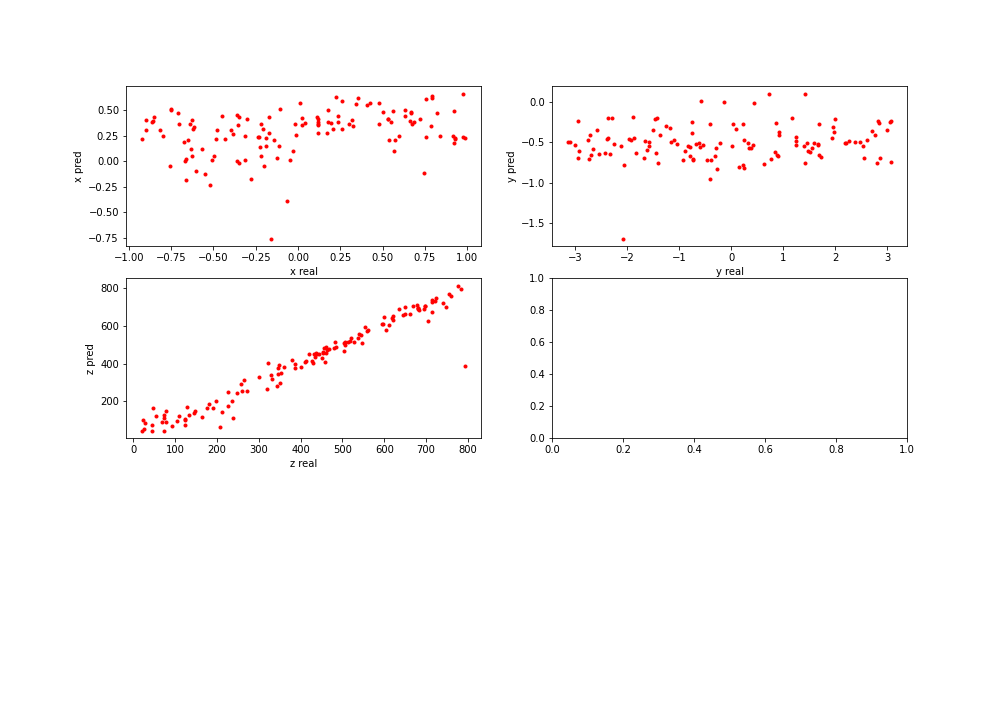

IndexError: index 3 is out of bounds for axis 1 with size 3

In [6]:
%matplotlib notebook

idx = 0

plt.figure(figsize=(14, 10))
#inf_list = ['r_s', 'l_t', 'r_t', 'r_d', 'r_tu', 'l_d']

ax_s = plt.subplot(321)
ax_s.scatter(y[:,0], output[:,0], c='red', marker='.')
ax_s.set_xlabel('x real')
ax_s.set_ylabel('x pred')

ax_t = plt.subplot(322)
ax_t.scatter(y[:,1], output[:,1], c='red', marker='.')
ax_t.set_xlabel('y real')
ax_t.set_ylabel('y pred')

ax_t = plt.subplot(323)
ax_t.scatter(y[:,2], output[:,2], c='red', marker='.')
ax_t.set_xlabel('z real')
ax_t.set_ylabel('z pred')

ax_t = plt.subplot(324)
ax_t.scatter(y[:,3], output[:,3], c='red', marker='.')
ax_t.set_xlabel('h real')
ax_t.set_ylabel('h pred')

ax_t = plt.subplot(325)
ax_t.scatter(y[:,4], output[:,4], c='red', marker='.')
ax_t.set_xlabel('phi real')
ax_t.set_ylabel('phi pred')

ax_t = plt.subplot(326)
ax_t.scatter(y[:,5], output[:,5], c='red', marker='.')
ax_t.set_xlabel('trunk length real')
ax_t.set_ylabel('trunk length pred')

# ax_t = plt.subplot(324)
# ax_t.scatter(y[:,3], output[:,3], c='red', marker='.')
# ax_t.set_xlabel('dendrite radius real')
# ax_t.set_ylabel('dendrite radius pred')

# ax_t = plt.subplot(325)
# ax_t.scatter(y[:,4], output[:,4], c='red', marker='.')
# ax_t.set_xlabel('tuft radius real')
# ax_t.set_ylabel('tuft radius pred')

# ax_t = plt.subplot(326)
# ax_t.scatter(y[:,5], output[:,5], c='red', marker='.')
# ax_t.set_xlabel('dendrite length real')
# ax_t.set_ylabel('dendrite length pred')

plt.show()

In [ ]:
%matplotlib notebook

idx = 0#[0, 1, 2, 3, 4, 5]

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(y[idx,0], y[idx,1], y[idx,2], c='green', marker='.')
ax.scatter3D(output[idx,0], output[idx,1], output[idx,2], c='red', marker='^')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plt.show()